In [117]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree
from IPython.display import HTML

style = "<style>svg{width:90% !important;height:90% !important;}</style>"
HTML(style)

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [65]:
df = pd.read_csv('data/training_mush.csv')
# df = df.rename(columns={'class': 'target'})
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [66]:
# Определим X и y
X = df.drop('class', axis='columns')
y = df['class']

In [67]:
clf = RandomForestClassifier(random_state=0)

In [68]:
params = {'n_estimators': range(10, 50, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 7),
          'min_samples_split': range(2, 9, 2)}

In [69]:
beast_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [70]:
beast_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [71]:
beast_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

## Выберите правильные утверждения о важности фичей для нашего классификатора
Выберите один вариант из списка:
odor > population > gill-attachment
cap-surface > odor > gill-attachment
stalk-color-below-ring > stalk-root > odor
habitat > stalk-shape > odor

In [72]:
columns = list(X)
df_features = pd.DataFrame({'feature': columns, 'num': beast_clf.best_estimator_.feature_importances_})
df_features.sort_values('num', ascending=False)

,feature,num
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


## Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).
Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [73]:
df_test = pd.read_csv('data/testing_mush.csv')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [74]:
sum(beast_clf.predict(df_test))

976

## Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [75]:
y_pred = pd.DataFrame(beast_clf.predict(df_test))
y_true = pd.read_csv('data/testing_y_mush.csv')['class']

In [76]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

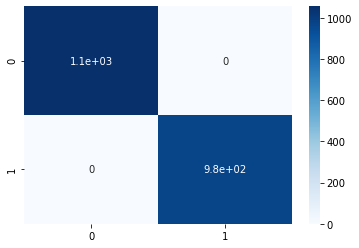

In [77]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues")

# Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [79]:
# df для тренировки
df_train = pd.read_csv('data/invasion.csv')
df_train.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [81]:
x_train = df_train.drop('class', axis='columns')
y_train = df_train['class']

In [82]:
x_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [83]:
y_train

0      transport
1      transport
2      transport
3        fighter
4        fighter
         ...    
495      fighter
496    transport
497      fighter
498      fighter
499    transport
Name: class, Length: 500, dtype: object

In [84]:
x_test = pd.read_csv('data/operative_information.csv')
x_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [98]:
clf = RandomForestClassifier()
params = {'n_estimators': range(10, 50, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 7),
          'min_samples_split': range(2, 9, 2)}
best_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [99]:
best_clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [100]:
pd.Series(best_clf.predict(x_test)).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [101]:
best_clf.best_estimator_.feature_importances_

array([0.14049645, 0.13148794, 0.0958454 , 0.30013896, 0.        ,
       0.33203124])

In [102]:
list(x_train)

['g_reflection',
 'i_reflection',
 'speed',
 'brightness',
 'time_of_observance',
 'volume']

# Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [103]:
df_space = pd.read_csv('data/space_can_be_a_dangerous_place.csv')
df_space.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [107]:
x_train = df_space.drop('dangerous', axis='columns')
y_train = df_space.dangerous
clf = RandomForestClassifier()
# params = {'n_estimators': range(10, 50, 10),
#           'max_depth': range(1, 12, 2),
#           'min_samples_leaf': range(1, 7),
#           'min_samples_split': range(2, 9, 2)}
# best_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)
best_clf = clf

In [108]:
best_clf.fit(x_train, y_train)

RandomForestClassifier()

In [110]:
columns = list(x_train)
df_features = pd.DataFrame({'feature': columns, 'num': best_clf.feature_importances_})
df_features.sort_values('num', ascending=False)

,feature,num
3,dustiness,0.238897
0,r,0.187215
2,peradventure_index,0.186741
1,phi,0.173519
5,buggers_were_noticed,0.120134
6,nearby_system_has_planemo,0.089669
4,black_hole_is_near,0.003824


In [111]:
df_space.groupby('buggers_were_noticed').agg({'dangerous':'mean'})

,dangerous
buggers_were_noticed,
0,0.528782
1,0.930118


In [112]:
df_space.groupby('nearby_system_has_planemo').agg({'dangerous':'mean'})

,dangerous
nearby_system_has_planemo,
0,0.000000
1,0.910809


In [113]:
df_space.groupby('black_hole_is_near').agg({'dangerous':'mean'})

,dangerous
black_hole_is_near,
0,0.896484
1,0.946813


<AxesSubplot:>

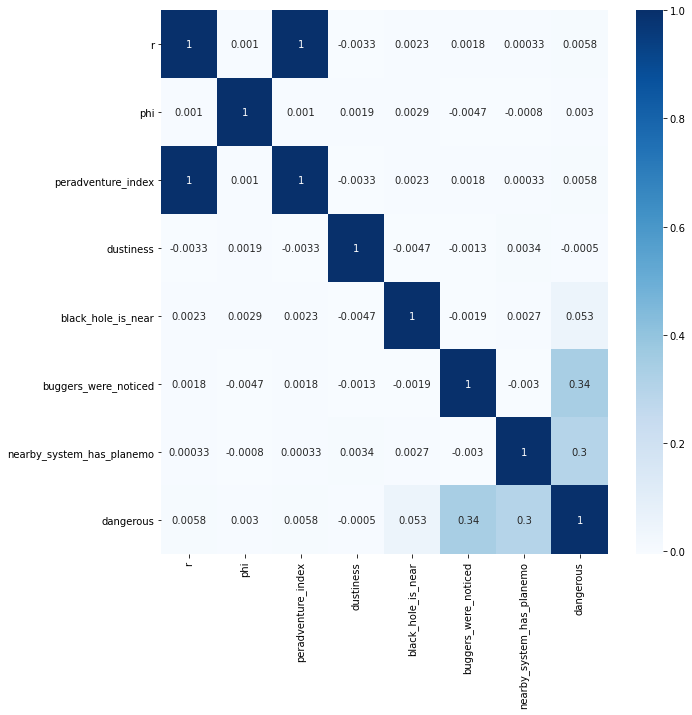

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_space.corr(), annot=True, cmap=plt.cm.Blues, ax=ax)